In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
cmap = sns.color_palette("Greens", 10)

In [ ]:
df=pd.read_csv("/content/city_day.csv")
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


<Axes: >

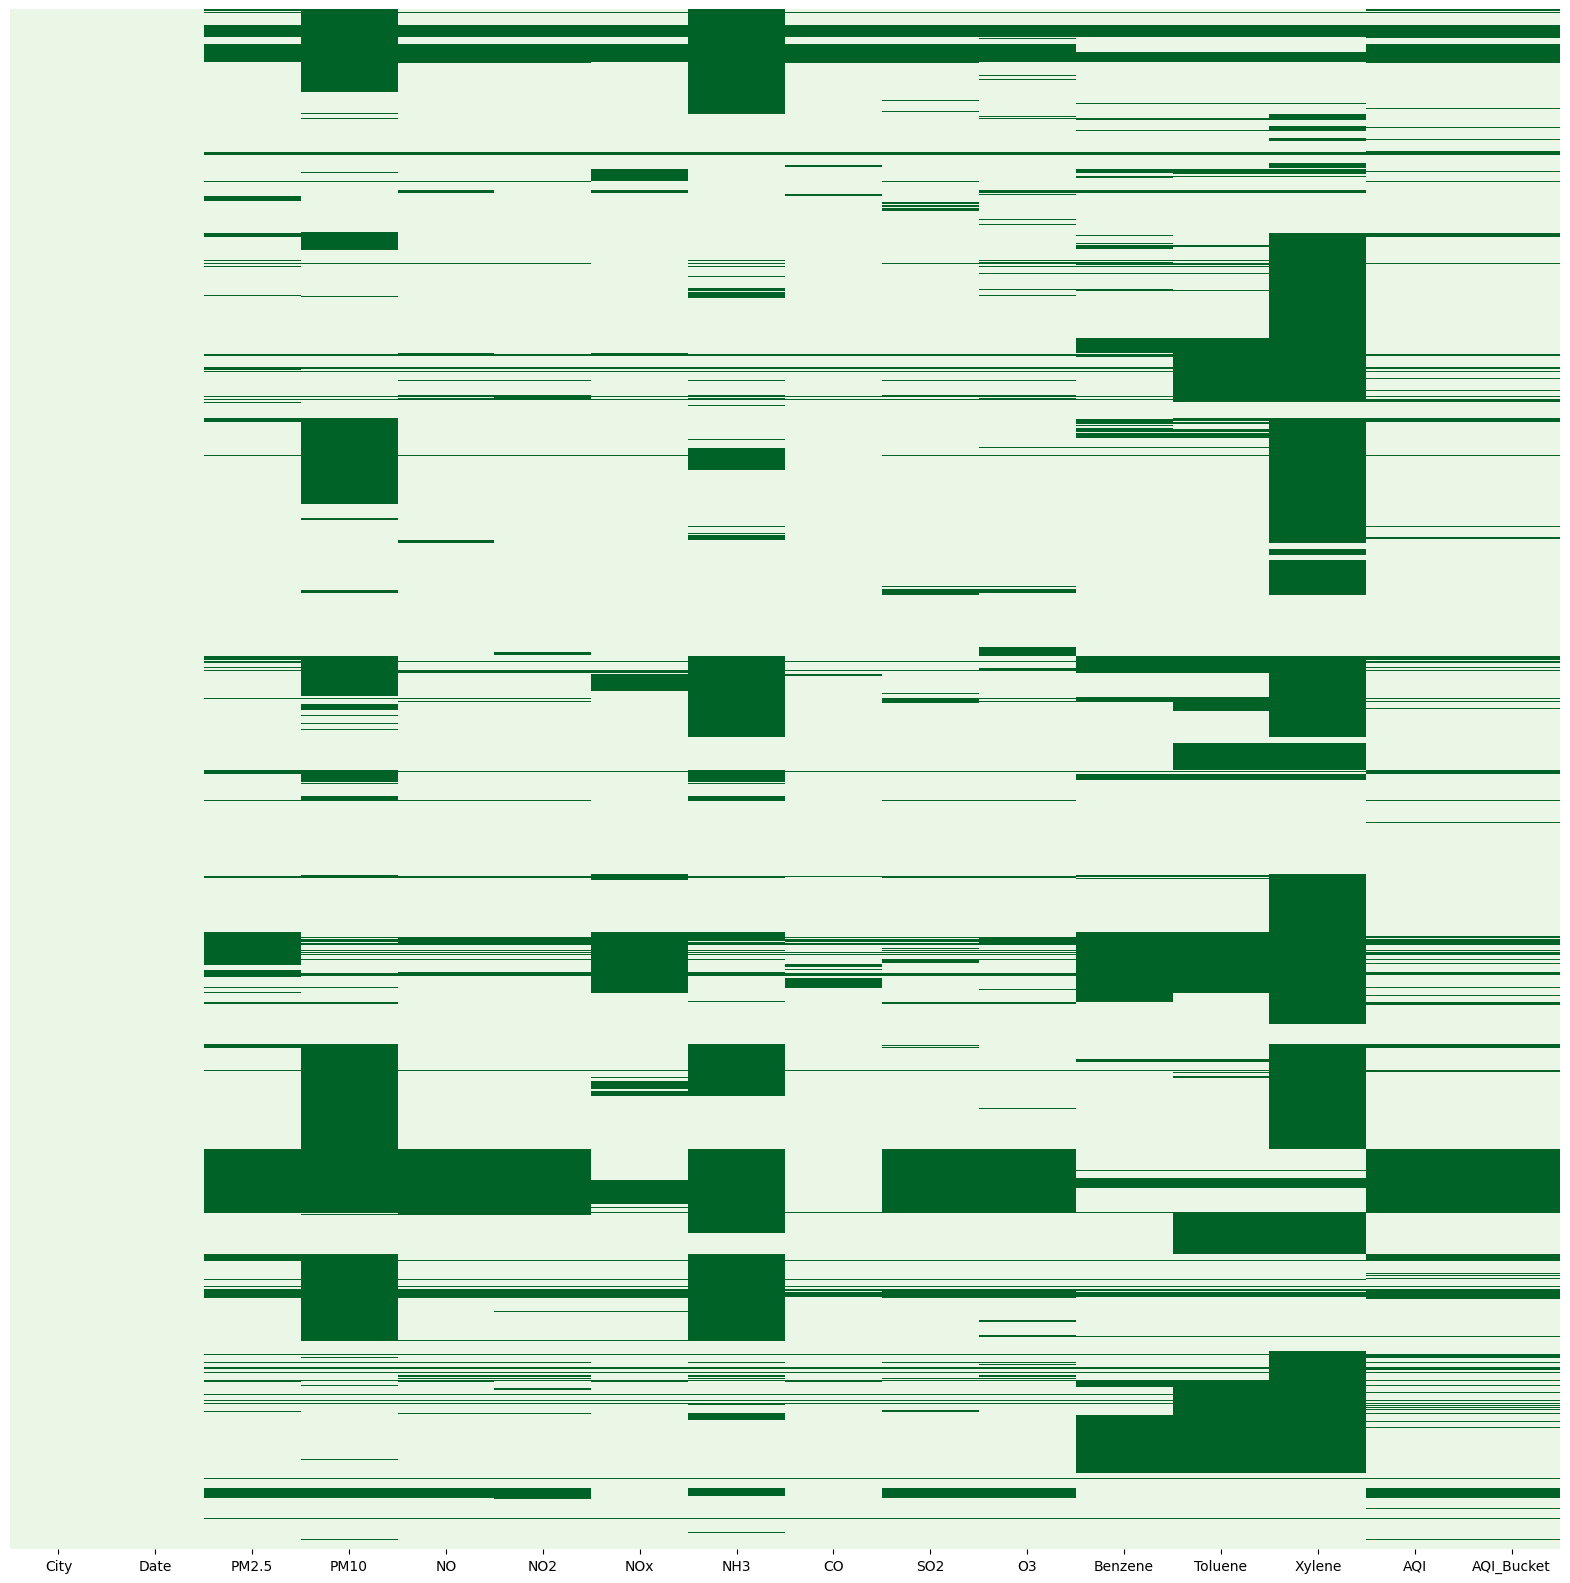

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull(), yticklabels=False, cbar = False, cmap = cmap)

In [ ]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [ ]:
percentage = (df.isnull().sum()/df.shape[0])* 100

In [ ]:
sort_percentage = percentage.sort_values(ascending = False)
sort_percentage

Xylene        61.322001
PM10          37.723071
NH3           34.973418
Toluene       27.229014
Benzene       19.041008
AQI           15.851139
AQI_Bucket    15.851139
PM2.5         15.570079
NOx           14.171549
O3            13.619586
SO2           13.050692
NO2           12.139785
NO            12.129626
CO             6.972334
City           0.000000
Date           0.000000
dtype: float64

In [ ]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [ ]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
null_counts = df.isnull().sum(axis=1)
null_counts

0        5
1        5
2        5
3        5
4        5
        ..
29526    0
29527    0
29528    0
29529    0
29530    3
Length: 29531, dtype: int64

In [ ]:
null_counts.unique()


array([ 5,  7,  4,  2, 14,  3, 12, 11,  8,  6,  9, 10,  1,  0, 13])

In [ ]:
rows_to_keep = null_counts <=12
rows_to_keep

0        True
1        True
2        True
3        True
4        True
         ... 
29526    True
29527    True
29528    True
29529    True
29530    True
Length: 29531, dtype: bool

In [ ]:
df_cleaned = df[rows_to_keep]

In [ ]:
df_cleaned

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
# df.set_index('Date', inplace = True)
df_cleaned.drop("Date",axis=1,inplace=True)

<ipython-input-17-087148b0793c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop("Date",axis=1,inplace=True)


In [ ]:
df_cleaned

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
columns_to_transform = df_cleaned.columns[1:14]
#

In [ ]:
columns_to_transform

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')

In [ ]:
colums_plot=df_cleaned.columns[1:12]
colums_plot

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene'],
      dtype='object')

<Axes: xlabel='PM2.5', ylabel='Count'>

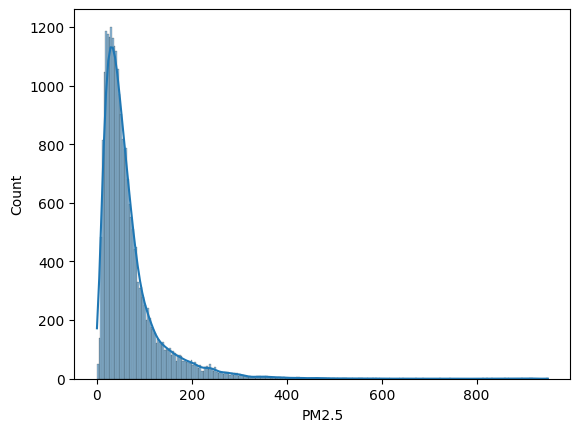

In [ ]:
sns.histplot(x="PM2.5",data=df_cleaned,kde=True)

<Axes: xlabel='PM10', ylabel='Count'>

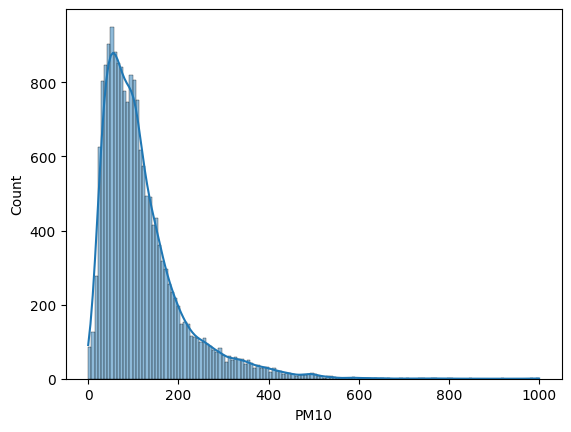

In [ ]:
sns.histplot(x="PM10",data=df_cleaned,kde=True)


<Axes: xlabel='NO', ylabel='Count'>

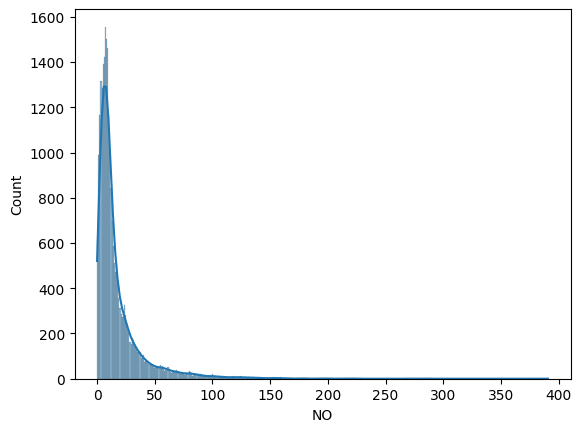

In [ ]:
sns.histplot(x="NO",data=df_cleaned,kde=True)


<Axes: xlabel='NO2', ylabel='Count'>

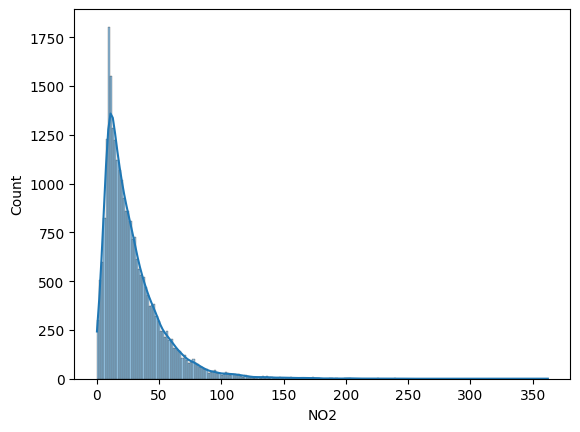

In [ ]:
sns.histplot(x="NO2",data=df_cleaned,kde=True)


<Axes: xlabel='NOx', ylabel='Count'>

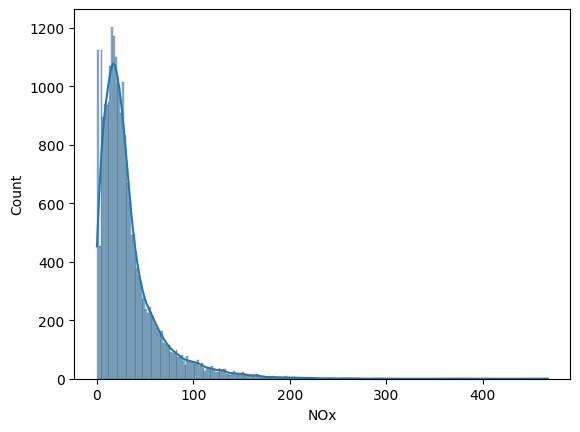

In [ ]:
sns.histplot(x="NOx",data=df_cleaned,kde=True)


<Axes: xlabel='NH3', ylabel='Count'>

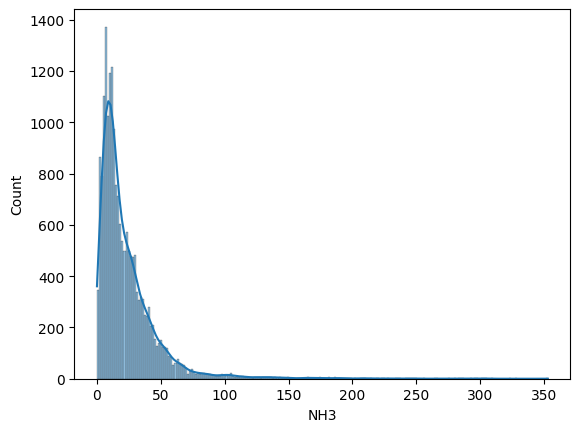

In [ ]:
sns.histplot(x="NH3",data=df_cleaned,kde=True)


<Axes: xlabel='CO', ylabel='Count'>

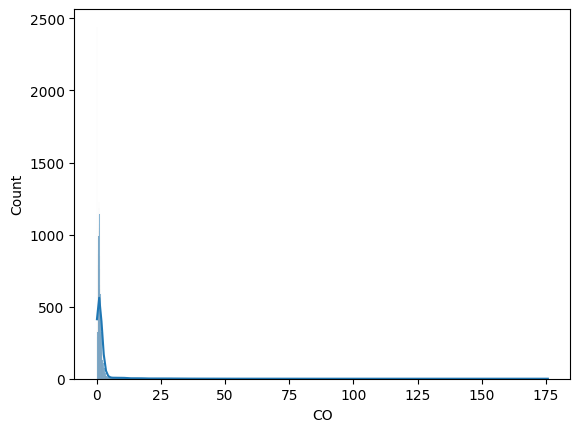

In [ ]:
sns.histplot(x="CO",data=df_cleaned,kde=True)


<Axes: xlabel='SO2', ylabel='Count'>

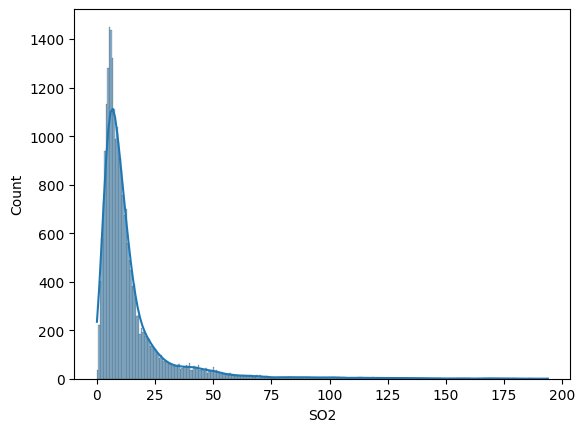

In [ ]:
sns.histplot(x="SO2",data=df_cleaned,kde=True)


<Axes: xlabel='O3', ylabel='Count'>

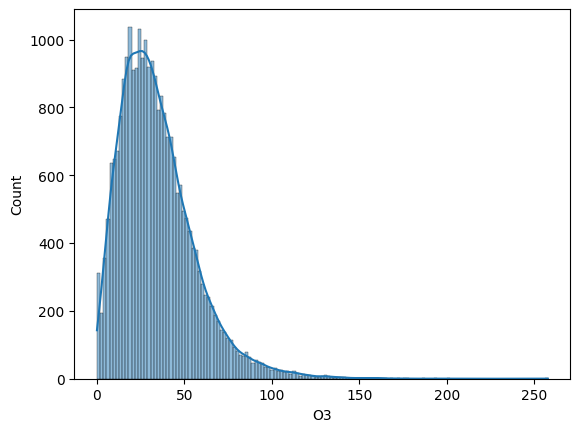

In [ ]:
sns.histplot(x="O3",data=df_cleaned,kde=True)


In [ ]:
# columns_to_transform = df.columns[0:13]

df_cleaned[columns_to_transform] = df_cleaned.groupby("City")[columns_to_transform].transform(lambda x: x.fillna(x.median()))

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
<ipython-input-38-7e882f625dd5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[columns_to_transform] = df_cleaned.groupby("City")[columns_to_transform].transform(lambda x: x.fillna(x.median()))


In [ ]:
df_cleaned[columns_to_transform]

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,58.37,107.96,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,384.5
1,58.37,107.96,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,384.5
2,58.37,107.96,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,384.5
3,58.37,107.96,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,384.5
4,58.37,107.96,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,384.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0
29527,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0
29528,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0
29529,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0


In [ ]:
df_cleaned.isna().sum()

City              0
PM2.5             0
PM10           1991
NO                0
NO2               0
NOx             921
NH3            1559
CO                0
SO2               0
O3              159
Benzene        2462
Toluene        3593
Xylene        12435
AQI               0
AQI_Bucket     3115
dtype: int64

<Axes: >

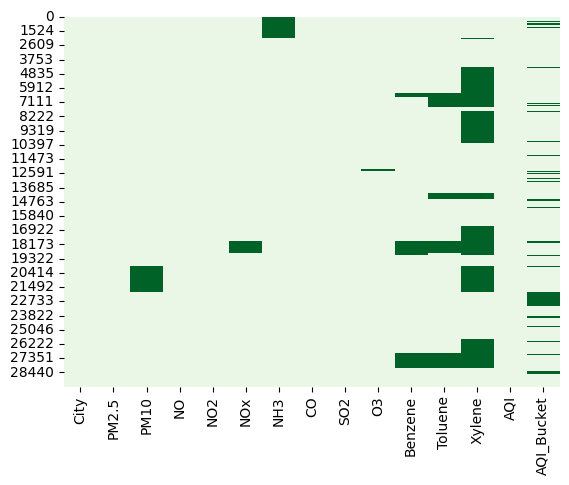

In [ ]:
sns.heatmap(df_cleaned.isnull(), cbar = False, cmap = cmap)

In [ ]:
df_cleaned.iloc[20414]

City           Lucknow
PM2.5            84.49
PM10               NaN
NO                7.87
NO2              21.32
NOx               17.5
NH3               28.0
CO                 0.9
SO2               6.67
O3               52.26
Benzene           0.87
Toluene           2.88
Xylene             NaN
AQI              195.0
AQI_Bucket    Moderate
Name: 21462, dtype: object

In [ ]:
df.groupby("City")["PM10"].mean()

City
Ahmedabad             114.584029
Aizawl                 23.352857
Amaravati              76.362020
Amritsar              115.202599
Bengaluru              83.243287
Bhopal                119.324321
Brajrajnagar          124.217373
Chandigarh             85.656546
Chennai                62.834404
Coimbatore             37.982137
Delhi                 232.809229
Ernakulam              48.335633
Gurugram              191.504432
Guwahati              116.604900
Hyderabad              91.931532
Jaipur                123.483509
Jorapokhar            149.657942
Kochi                  67.335432
Kolkata               115.629499
Lucknow                      NaN
Mumbai                 96.745059
Patna                 126.747958
Shillong               42.199170
Talcher               165.772708
Thiruvananthapuram     52.863659
Visakhapatnam         105.951354
Name: PM10, dtype: float64

In [ ]:
# df.iloc[18176]

In [ ]:
df.groupby("City")["NOx"].mean()


City
Ahmedabad             47.366898
Aizawl                12.610354
Amaravati             15.380413
Amritsar              35.648294
Bengaluru             19.717092
Bhopal                22.428964
Brajrajnagar          24.542647
Chandigarh            15.058667
Chennai               17.667942
Coimbatore            30.887042
Delhi                 58.567023
Ernakulam             24.287595
Gurugram              29.377311
Guwahati              44.305669
Hyderabad             19.438754
Jaipur                39.637176
Jorapokhar                  NaN
Kochi                 68.412901
Kolkata               63.365695
Lucknow               22.525300
Mumbai                55.038795
Patna                 45.952471
Shillong               1.002202
Talcher               31.895735
Thiruvananthapuram     8.181496
Visakhapatnam         25.235829
Name: NOx, dtype: float64

In [ ]:
# df.iloc[18200]

In [ ]:
df_cleaned[columns_to_transform].isna().sum()

PM2.5          0
PM10        1991
NO             0
NO2            0
NOx          921
NH3         1559
CO             0
SO2            0
O3           159
Benzene     2462
Toluene     3593
Xylene     12435
AQI            0
dtype: int64

In [ ]:
df1=df_cleaned[columns_to_transform]

<Axes: >

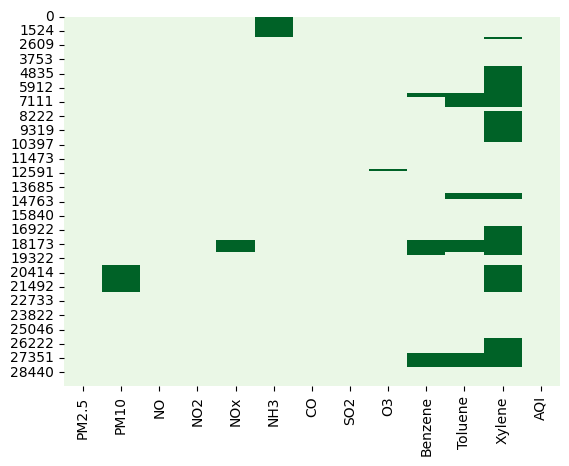

In [ ]:
sns.heatmap(df1.isnull(), cbar = False, cmap = cmap)

In [ ]:
df1

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,58.37,107.96,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,384.5
1,58.37,107.96,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,384.5
2,58.37,107.96,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,384.5
3,58.37,107.96,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,384.5
4,58.37,107.96,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,384.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0
29527,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0
29528,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0
29529,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0


In [ ]:
df1["City"]=df_cleaned["City"]
df1

<ipython-input-51-77bd9a61c00f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["City"]=df_cleaned["City"]


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,City
0,58.37,107.96,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,384.5,Ahmedabad
1,58.37,107.96,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,384.5,Ahmedabad
2,58.37,107.96,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,384.5,Ahmedabad
3,58.37,107.96,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,384.5,Ahmedabad
4,58.37,107.96,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,384.5,Ahmedabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Visakhapatnam
29527,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Visakhapatnam
29528,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Visakhapatnam
29529,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Visakhapatnam


In [ ]:
df1.groupby("City")["PM10"].median()

City
Ahmedabad             107.960
Aizawl                 18.960
Amaravati              64.895
Amritsar               98.090
Bengaluru              77.360
Bhopal                120.485
Brajrajnagar          119.410
Chandigarh             78.935
Chennai                50.245
Coimbatore             36.220
Delhi                 216.730
Ernakulam              44.635
Gurugram              176.090
Guwahati               87.975
Hyderabad              94.480
Jaipur                116.825
Jorapokhar            124.635
Kochi                  45.655
Kolkata                81.770
Lucknow                   NaN
Mumbai                 77.880
Patna                 118.020
Shillong               26.930
Talcher               129.075
Thiruvananthapuram     48.330
Visakhapatnam         100.685
Name: PM10, dtype: float64

In [ ]:
df1.groupby("City")["AQI"].median()


City
Ahmedabad             384.5
Aizawl                 23.0
Amaravati              78.0
Amritsar              101.0
Bengaluru              86.0
Bhopal                120.0
Brajrajnagar          122.0
Chandigarh             82.0
Chennai               100.0
Coimbatore             75.0
Delhi                 257.0
Ernakulam              94.0
Gurugram              208.0
Guwahati               98.0
Hyderabad             104.0
Jaipur                122.0
Jorapokhar            133.0
Kochi                  99.0
Kolkata                94.0
Lucknow               198.0
Mumbai                 91.0
Patna                 215.0
Shillong               48.0
Talcher               128.5
Thiruvananthapuram     68.0
Visakhapatnam         106.0
Name: AQI, dtype: float64

<ipython-input-54-7406fcbe9ea2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(),annot=True,cmap=cmap)


<Axes: >

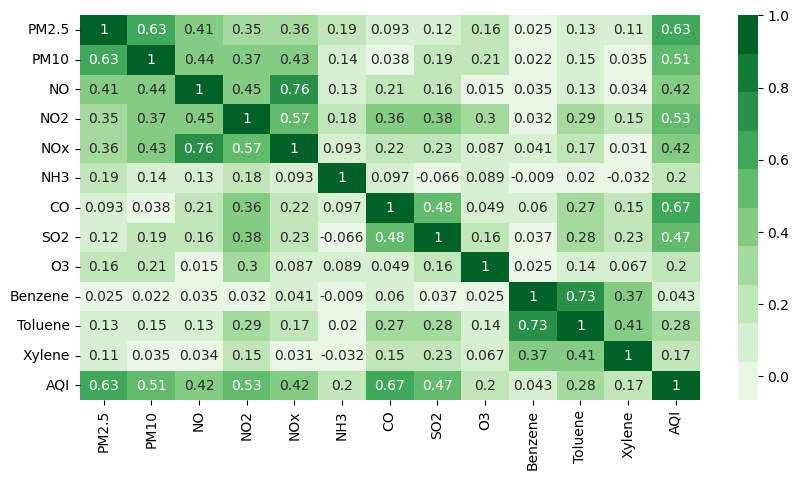

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df1.corr(),annot=True,cmap=cmap)

<Axes: >

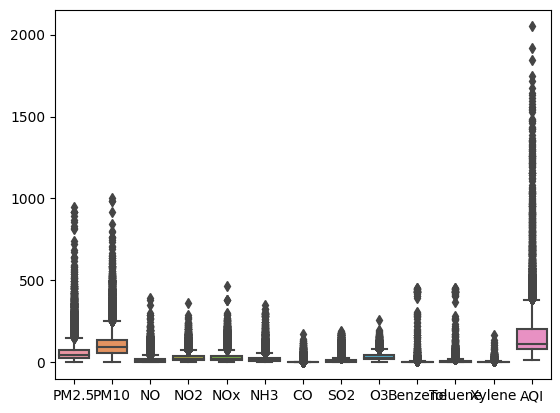

In [ ]:
sns.boxplot(df1)

In [ ]:
df1.drop(["Xylene"],axis=1,inplace=True)
df1

<ipython-input-56-db1fed6b245c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(["Xylene"],axis=1,inplace=True)


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,City
0,58.37,107.96,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,384.5,Ahmedabad
1,58.37,107.96,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,384.5,Ahmedabad
2,58.37,107.96,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,384.5,Ahmedabad
3,58.37,107.96,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,384.5,Ahmedabad
4,58.37,107.96,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,384.5,Ahmedabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0,Visakhapatnam
29527,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0,Visakhapatnam
29528,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0,Visakhapatnam
29529,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.0,Visakhapatnam


In [ ]:
df1.reset_index(drop=True,inplace=True)
df1

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,City
0,58.37,107.96,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,384.5,Ahmedabad
1,58.37,107.96,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,384.5,Ahmedabad
2,58.37,107.96,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,384.5,Ahmedabad
3,58.37,107.96,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,384.5,Ahmedabad
4,58.37,107.96,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,384.5,Ahmedabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27960,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0,Visakhapatnam
27961,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0,Visakhapatnam
27962,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0,Visakhapatnam
27963,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.0,Visakhapatnam


In [ ]:
(df1.isna().sum()/27965)*100

PM2.5       0.000000
PM10        7.119614
NO          0.000000
NO2         0.000000
NOx         3.293402
NH3         5.574826
CO          0.000000
SO2         0.000000
O3          0.568568
Benzene     8.803862
Toluene    12.848203
AQI         0.000000
City        0.000000
dtype: float64

<Axes: xlabel='PM10', ylabel='Count'>

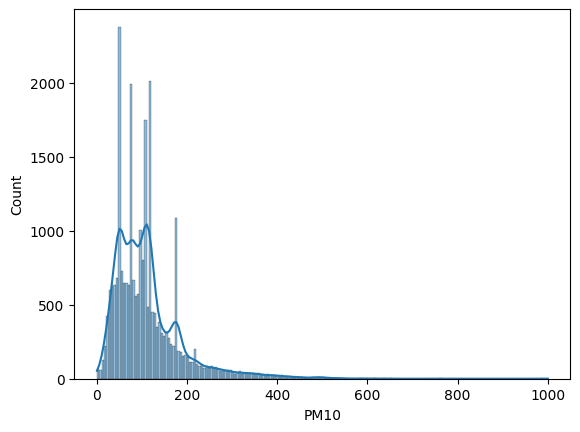

In [ ]:
sns.histplot(df1.PM10,kde=True)

In [ ]:
columns_to_transform1 = df1.columns[1:11]
columns_to_transform1
#

Index(['PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene',
       'Toluene'],
      dtype='object')

In [ ]:
# columns_to_transform = df.columns[0:13]

df1[columns_to_transform1] = df1[columns_to_transform1].transform(lambda x: x.fillna(x.median()))

<ipython-input-61-5f493943772b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[columns_to_transform1] = df1[columns_to_transform1].transform(lambda x: x.fillna(x.median()))


In [ ]:
df1

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,City
0,58.37,107.96,0.92,18.22,17.15,15.06,0.92,27.64,133.36,0.00,0.02,384.5,Ahmedabad
1,58.37,107.96,0.97,15.69,16.46,15.06,0.97,24.55,34.06,3.68,5.50,384.5,Ahmedabad
2,58.37,107.96,17.40,19.30,29.70,15.06,17.40,29.07,30.70,6.80,16.40,384.5,Ahmedabad
3,58.37,107.96,1.70,18.48,17.97,15.06,1.70,18.59,36.08,4.43,10.14,384.5,Ahmedabad
4,58.37,107.96,22.10,21.42,37.76,15.06,22.10,39.33,39.31,7.01,18.89,384.5,Ahmedabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27960,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0,Visakhapatnam
27961,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0,Visakhapatnam
27962,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0,Visakhapatnam
27963,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.0,Visakhapatnam


In [ ]:
df1.isna().sum()

PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
AQI        0
City       0
dtype: int64

<Axes: >

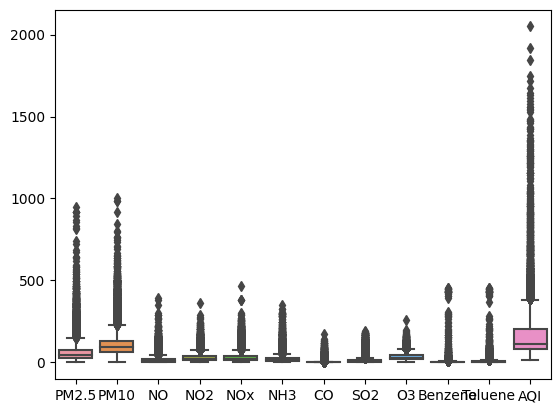

In [ ]:
sns.boxplot(df1)

In [ ]:
df1.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
count,27965.000000,27965.000000,27965.000000,27965.000000,27965.000000,27965.000000,27965.000000,27965.000000,27965.000000,27965.000000,27965.000000,27965.000000
mean,65.007998,111.482157,17.716722,28.181238,31.797232,22.184025,2.312283,14.592055,34.074143,2.955579,7.190740,163.193063
std,61.872981,76.893622,22.045608,23.768227,30.258678,21.951434,6.982669,17.641181,20.847907,14.642587,17.746201,135.760616
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,13.000000
25%,27.810000,61.280000,5.930000,12.100000,13.980000,10.770000,0.510000,5.900000,19.730000,0.180000,0.660000,84.000000
50%,47.120000,97.325000,10.490000,21.460000,23.690000,15.060000,0.890000,9.630000,29.860000,1.040000,2.650000,114.000000
75%,77.490000,128.820000,22.220000,36.500000,39.420000,27.800000,1.460000,14.900000,43.950000,2.690000,6.610000,204.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,2049.000000


In [ ]:
upper_limit = df1['PM2.5'].mean()+ 3*df1['PM2.5'].std()

lower_limit = df1['PM2.5'].mean()- 3*df1['PM2.5'].std()

upper_limit,lower_limit

(250.626940728646, -120.61094430454443)

In [ ]:
df1.loc[ df1['PM2.5']>upper_limit]

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,City
426,381.69,107.96,29.49,25.41,54.90,15.06,29.49,49.33,15.74,13.10,28.16,472.0,Ahmedabad
428,271.85,107.96,16.39,15.28,31.68,15.06,16.39,33.31,41.24,3.52,8.61,721.0,Ahmedabad
833,302.08,107.96,27.20,28.10,34.00,15.06,27.20,46.94,0.88,5.26,43.43,440.0,Ahmedabad
2634,296.84,138.35,13.41,16.92,27.72,30.49,0.00,15.32,15.81,3.19,2.06,117.0,Amritsar
2636,868.66,116.29,13.21,16.46,27.72,30.05,0.00,27.92,15.99,3.19,2.06,110.0,Amritsar
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24355,274.92,368.06,1.28,3.63,1.44,3.66,0.28,5.14,19.11,0.26,1.42,48.0,Shillong
24656,283.31,488.72,173.68,36.38,185.73,28.93,3.30,52.69,30.91,0.00,0.00,484.0,Talcher
24665,331.81,382.08,140.16,43.96,184.13,25.29,3.34,4.21,36.52,0.00,0.00,128.5,Talcher
25288,342.42,434.27,19.21,7.29,19.00,1.78,1.45,10.28,28.36,0.00,0.00,128.5,Talcher


In [ ]:
df.groupby("City")["PM2.5"].mean().sort_values()

City
Aizawl                 17.130000
Ernakulam              24.944747
Thiruvananthapuram     28.036617
Coimbatore             29.151587
Shillong               30.823984
Kochi                  31.428519
Mumbai                 35.198393
Bengaluru              35.819828
Amaravati              37.773217
Chandigarh             41.130242
Visakhapatnam          46.969610
Hyderabad              47.035357
Bhopal                 50.059571
Chennai                50.425613
Jaipur                 54.500708
Amritsar               55.468335
Talcher                61.405425
Guwahati               63.685429
Brajrajnagar           64.057610
Jorapokhar             64.228918
Kolkata                64.362833
Ahmedabad              67.854497
Lucknow               109.714059
Gurugram              117.104007
Delhi                 117.196153
Patna                 123.498562
Name: PM2.5, dtype: float64

In [ ]:
df1.groupby("City")["PM2.5"].mean().sort_values()

City
Aizawl                 17.012301
Ernakulam              24.912107
Thiruvananthapuram     27.887352
Mumbai                 28.649129
Coimbatore             29.141641
Shillong               29.324458
Kochi                  31.428519
Bengaluru              35.466006
Amaravati              37.718824
Chandigarh             40.742401
Visakhapatnam          46.092883
Hyderabad              46.753799
Bhopal                 50.059571
Chennai                50.194607
Jaipur                 54.474982
Amritsar               54.505846
Talcher                59.920664
Jorapokhar             62.146298
Kolkata                62.956560
Guwahati               63.651753
Brajrajnagar           63.892946
Ahmedabad              66.771597
Lucknow               108.717363
Gurugram              115.492084
Delhi                 117.173678
Patna                 120.239865
Name: PM2.5, dtype: float64

In [ ]:
df.groupby("City")["PM2.5"].max()


City
Ahmedabad             381.69
Aizawl                 54.90
Amaravati             139.38
Amritsar              868.66
Bengaluru             313.59
Bhopal                136.42
Brajrajnagar          308.79
Chandigarh            154.85
Chennai               293.43
Coimbatore             63.10
Delhi                 685.36
Ernakulam              78.27
Gurugram              949.99
Guwahati              916.67
Hyderabad             571.02
Jaipur                311.35
Jorapokhar            217.13
Kochi                 143.85
Kolkata               304.74
Lucknow               742.67
Mumbai                134.32
Patna                 645.50
Shillong              917.77
Talcher               354.44
Thiruvananthapuram     98.87
Visakhapatnam         203.05
Name: PM2.5, dtype: float64

In [ ]:
df1.groupby("City")["PM2.5"].max()


City
Ahmedabad             381.69
Aizawl                 54.90
Amaravati             139.38
Amritsar              868.66
Bengaluru             313.59
Bhopal                136.42
Brajrajnagar          308.79
Chandigarh            154.85
Chennai               293.43
Coimbatore             63.10
Delhi                 685.36
Ernakulam              78.27
Gurugram              949.99
Guwahati              916.67
Hyderabad             571.02
Jaipur                311.35
Jorapokhar            217.13
Kochi                 143.85
Kolkata               304.74
Lucknow               742.67
Mumbai                134.32
Patna                 645.50
Shillong              917.77
Talcher               354.44
Thiruvananthapuram     98.87
Visakhapatnam         203.05
Name: PM2.5, dtype: float64

#Z Score Method

In [ ]:
df1.loc[(df1['PM2.5']<lower_limit) | (df1['PM2.5']>upper_limit)]

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,City
426,381.69,107.96,29.49,25.41,54.90,15.06,29.49,49.33,15.74,13.10,28.16,472.0,Ahmedabad
428,271.85,107.96,16.39,15.28,31.68,15.06,16.39,33.31,41.24,3.52,8.61,721.0,Ahmedabad
833,302.08,107.96,27.20,28.10,34.00,15.06,27.20,46.94,0.88,5.26,43.43,440.0,Ahmedabad
2634,296.84,138.35,13.41,16.92,27.72,30.49,0.00,15.32,15.81,3.19,2.06,117.0,Amritsar
2636,868.66,116.29,13.21,16.46,27.72,30.05,0.00,27.92,15.99,3.19,2.06,110.0,Amritsar
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24355,274.92,368.06,1.28,3.63,1.44,3.66,0.28,5.14,19.11,0.26,1.42,48.0,Shillong
24656,283.31,488.72,173.68,36.38,185.73,28.93,3.30,52.69,30.91,0.00,0.00,484.0,Talcher
24665,331.81,382.08,140.16,43.96,184.13,25.29,3.34,4.21,36.52,0.00,0.00,128.5,Talcher
25288,342.42,434.27,19.21,7.29,19.00,1.78,1.45,10.28,28.36,0.00,0.00,128.5,Talcher


In [ ]:
df1.loc[~((df1['PM2.5']<lower_limit) | (df1['PM2.5']>upper_limit))]

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,City
0,58.37,107.96,0.92,18.22,17.15,15.06,0.92,27.64,133.36,0.00,0.02,384.5,Ahmedabad
1,58.37,107.96,0.97,15.69,16.46,15.06,0.97,24.55,34.06,3.68,5.50,384.5,Ahmedabad
2,58.37,107.96,17.40,19.30,29.70,15.06,17.40,29.07,30.70,6.80,16.40,384.5,Ahmedabad
3,58.37,107.96,1.70,18.48,17.97,15.06,1.70,18.59,36.08,4.43,10.14,384.5,Ahmedabad
4,58.37,107.96,22.10,21.42,37.76,15.06,22.10,39.33,39.31,7.01,18.89,384.5,Ahmedabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27960,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0,Visakhapatnam
27961,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0,Visakhapatnam
27962,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0,Visakhapatnam
27963,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.0,Visakhapatnam


In [ ]:
df2=df1.loc[~((df1['PM2.5']<lower_limit) | (df1['PM2.5']>upper_limit))]

<Axes: >

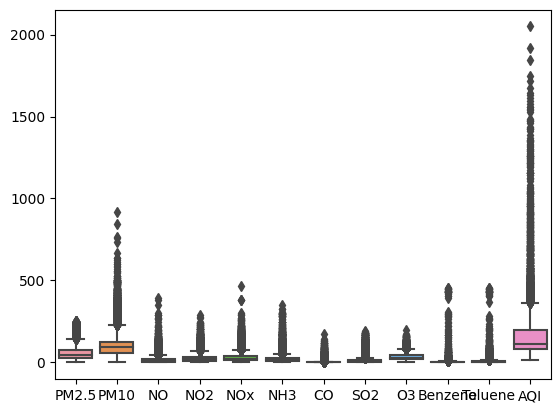

In [ ]:
sns.boxplot(df2)

In [ ]:
upper_limit = df1['PM10'].mean()+ 3*df1['PM10'].std()

lower_limit = df1['PM10'].mean()- 3*df1['PM10'].std()

upper_limit,lower_limit

(342.16302216312425, -119.1987089144205)

In [ ]:
df3=df2.loc[~((df1['PM10']<lower_limit) | (df1['PM10']>upper_limit))]
df3

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,City
0,58.37,107.96,0.92,18.22,17.15,15.06,0.92,27.64,133.36,0.00,0.02,384.5,Ahmedabad
1,58.37,107.96,0.97,15.69,16.46,15.06,0.97,24.55,34.06,3.68,5.50,384.5,Ahmedabad
2,58.37,107.96,17.40,19.30,29.70,15.06,17.40,29.07,30.70,6.80,16.40,384.5,Ahmedabad
3,58.37,107.96,1.70,18.48,17.97,15.06,1.70,18.59,36.08,4.43,10.14,384.5,Ahmedabad
4,58.37,107.96,22.10,21.42,37.76,15.06,22.10,39.33,39.31,7.01,18.89,384.5,Ahmedabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27960,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0,Visakhapatnam
27961,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0,Visakhapatnam
27962,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0,Visakhapatnam
27963,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.0,Visakhapatnam


In [ ]:
def outlier_remove(df,val):
  upper_limit = df[val].mean()+ 3*df[val].std()

  lower_limit = df[val].mean()- 3*df[val].std()
  df_out=df.loc[~((df[val]<lower_limit) | (df[val]>upper_limit))]
  return df_out

In [ ]:
df4=outlier_remove(df3,"NO")
df4

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,City
0,58.37,107.96,0.92,18.22,17.15,15.06,0.92,27.64,133.36,0.00,0.02,384.5,Ahmedabad
1,58.37,107.96,0.97,15.69,16.46,15.06,0.97,24.55,34.06,3.68,5.50,384.5,Ahmedabad
2,58.37,107.96,17.40,19.30,29.70,15.06,17.40,29.07,30.70,6.80,16.40,384.5,Ahmedabad
3,58.37,107.96,1.70,18.48,17.97,15.06,1.70,18.59,36.08,4.43,10.14,384.5,Ahmedabad
4,58.37,107.96,22.10,21.42,37.76,15.06,22.10,39.33,39.31,7.01,18.89,384.5,Ahmedabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27960,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0,Visakhapatnam
27961,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0,Visakhapatnam
27962,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0,Visakhapatnam
27963,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.0,Visakhapatnam


In [ ]:
df5=outlier_remove(df4,"NO2")
df5

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,City
0,58.37,107.96,0.92,18.22,17.15,15.06,0.92,27.64,133.36,0.00,0.02,384.5,Ahmedabad
1,58.37,107.96,0.97,15.69,16.46,15.06,0.97,24.55,34.06,3.68,5.50,384.5,Ahmedabad
2,58.37,107.96,17.40,19.30,29.70,15.06,17.40,29.07,30.70,6.80,16.40,384.5,Ahmedabad
3,58.37,107.96,1.70,18.48,17.97,15.06,1.70,18.59,36.08,4.43,10.14,384.5,Ahmedabad
4,58.37,107.96,22.10,21.42,37.76,15.06,22.10,39.33,39.31,7.01,18.89,384.5,Ahmedabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27960,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0,Visakhapatnam
27961,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0,Visakhapatnam
27962,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0,Visakhapatnam
27963,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.0,Visakhapatnam


In [ ]:
df6=outlier_remove(df5,"NO2")
df6

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,City
0,58.37,107.96,0.92,18.22,17.15,15.06,0.92,27.64,133.36,0.00,0.02,384.5,Ahmedabad
1,58.37,107.96,0.97,15.69,16.46,15.06,0.97,24.55,34.06,3.68,5.50,384.5,Ahmedabad
2,58.37,107.96,17.40,19.30,29.70,15.06,17.40,29.07,30.70,6.80,16.40,384.5,Ahmedabad
3,58.37,107.96,1.70,18.48,17.97,15.06,1.70,18.59,36.08,4.43,10.14,384.5,Ahmedabad
4,58.37,107.96,22.10,21.42,37.76,15.06,22.10,39.33,39.31,7.01,18.89,384.5,Ahmedabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27960,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0,Visakhapatnam
27961,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0,Visakhapatnam
27962,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0,Visakhapatnam
27963,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.0,Visakhapatnam


In [ ]:
df7=outlier_remove(df6,"NOx")
df7

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,City
0,58.37,107.96,0.92,18.22,17.15,15.06,0.92,27.64,133.36,0.00,0.02,384.5,Ahmedabad
1,58.37,107.96,0.97,15.69,16.46,15.06,0.97,24.55,34.06,3.68,5.50,384.5,Ahmedabad
2,58.37,107.96,17.40,19.30,29.70,15.06,17.40,29.07,30.70,6.80,16.40,384.5,Ahmedabad
3,58.37,107.96,1.70,18.48,17.97,15.06,1.70,18.59,36.08,4.43,10.14,384.5,Ahmedabad
4,58.37,107.96,22.10,21.42,37.76,15.06,22.10,39.33,39.31,7.01,18.89,384.5,Ahmedabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27960,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0,Visakhapatnam
27961,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0,Visakhapatnam
27962,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0,Visakhapatnam
27963,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.0,Visakhapatnam


In [ ]:
df8=outlier_remove(df7,"NH3")
df8

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,City
0,58.37,107.96,0.92,18.22,17.15,15.06,0.92,27.64,133.36,0.00,0.02,384.5,Ahmedabad
1,58.37,107.96,0.97,15.69,16.46,15.06,0.97,24.55,34.06,3.68,5.50,384.5,Ahmedabad
2,58.37,107.96,17.40,19.30,29.70,15.06,17.40,29.07,30.70,6.80,16.40,384.5,Ahmedabad
3,58.37,107.96,1.70,18.48,17.97,15.06,1.70,18.59,36.08,4.43,10.14,384.5,Ahmedabad
4,58.37,107.96,22.10,21.42,37.76,15.06,22.10,39.33,39.31,7.01,18.89,384.5,Ahmedabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27960,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0,Visakhapatnam
27961,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0,Visakhapatnam
27962,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0,Visakhapatnam
27963,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.0,Visakhapatnam


In [ ]:
df9=outlier_remove(df8,"CO")
df9

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,City
0,58.37,107.96,0.92,18.22,17.15,15.06,0.92,27.64,133.36,0.00,0.02,384.5,Ahmedabad
1,58.37,107.96,0.97,15.69,16.46,15.06,0.97,24.55,34.06,3.68,5.50,384.5,Ahmedabad
3,58.37,107.96,1.70,18.48,17.97,15.06,1.70,18.59,36.08,4.43,10.14,384.5,Ahmedabad
14,58.37,107.96,0.60,16.96,16.60,15.06,0.60,28.89,47.63,0.14,0.04,384.5,Ahmedabad
15,58.37,107.96,1.63,21.72,22.86,15.06,1.63,38.27,46.03,0.35,0.05,384.5,Ahmedabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27960,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0,Visakhapatnam
27961,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0,Visakhapatnam
27962,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0,Visakhapatnam
27963,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.0,Visakhapatnam


In [ ]:
df10=outlier_remove(df9,"SO2")
df10

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,City
0,58.37,107.96,0.92,18.22,17.15,15.06,0.92,27.64,133.36,0.00,0.02,384.5,Ahmedabad
1,58.37,107.96,0.97,15.69,16.46,15.06,0.97,24.55,34.06,3.68,5.50,384.5,Ahmedabad
3,58.37,107.96,1.70,18.48,17.97,15.06,1.70,18.59,36.08,4.43,10.14,384.5,Ahmedabad
14,58.37,107.96,0.60,16.96,16.60,15.06,0.60,28.89,47.63,0.14,0.04,384.5,Ahmedabad
15,58.37,107.96,1.63,21.72,22.86,15.06,1.63,38.27,46.03,0.35,0.05,384.5,Ahmedabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27960,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0,Visakhapatnam
27961,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0,Visakhapatnam
27962,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0,Visakhapatnam
27963,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.0,Visakhapatnam


In [ ]:
df11=outlier_remove(df10,"O3")
df11

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,City
1,58.37,107.96,0.97,15.69,16.46,15.06,0.97,24.55,34.06,3.68,5.50,384.5,Ahmedabad
3,58.37,107.96,1.70,18.48,17.97,15.06,1.70,18.59,36.08,4.43,10.14,384.5,Ahmedabad
14,58.37,107.96,0.60,16.96,16.60,15.06,0.60,28.89,47.63,0.14,0.04,384.5,Ahmedabad
15,58.37,107.96,1.63,21.72,22.86,15.06,1.63,38.27,46.03,0.35,0.05,384.5,Ahmedabad
16,58.37,107.96,11.44,24.73,34.75,15.06,11.44,49.50,52.24,0.68,0.00,384.5,Ahmedabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27960,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0,Visakhapatnam
27961,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0,Visakhapatnam
27962,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0,Visakhapatnam
27963,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.0,Visakhapatnam


In [ ]:
df12=outlier_remove(df11,"Benzene")
df12

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,City
1,58.37,107.96,0.97,15.69,16.46,15.06,0.97,24.55,34.06,3.68,5.50,384.5,Ahmedabad
3,58.37,107.96,1.70,18.48,17.97,15.06,1.70,18.59,36.08,4.43,10.14,384.5,Ahmedabad
14,58.37,107.96,0.60,16.96,16.60,15.06,0.60,28.89,47.63,0.14,0.04,384.5,Ahmedabad
15,58.37,107.96,1.63,21.72,22.86,15.06,1.63,38.27,46.03,0.35,0.05,384.5,Ahmedabad
16,58.37,107.96,11.44,24.73,34.75,15.06,11.44,49.50,52.24,0.68,0.00,384.5,Ahmedabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27960,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0,Visakhapatnam
27961,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0,Visakhapatnam
27962,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0,Visakhapatnam
27963,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.0,Visakhapatnam


In [ ]:
df13=outlier_remove(df12,"Toluene")
df13

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,City
1,58.37,107.96,0.97,15.69,16.46,15.06,0.97,24.55,34.06,3.68,5.50,384.5,Ahmedabad
3,58.37,107.96,1.70,18.48,17.97,15.06,1.70,18.59,36.08,4.43,10.14,384.5,Ahmedabad
14,58.37,107.96,0.60,16.96,16.60,15.06,0.60,28.89,47.63,0.14,0.04,384.5,Ahmedabad
15,58.37,107.96,1.63,21.72,22.86,15.06,1.63,38.27,46.03,0.35,0.05,384.5,Ahmedabad
16,58.37,107.96,11.44,24.73,34.75,15.06,11.44,49.50,52.24,0.68,0.00,384.5,Ahmedabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27960,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0,Visakhapatnam
27961,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0,Visakhapatnam
27962,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0,Visakhapatnam
27963,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.0,Visakhapatnam


In [ ]:
df14=outlier_remove(df13,"AQI")
df14

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,City
28,83.13,107.96,6.93,28.71,33.72,15.06,6.93,49.52,59.76,0.02,0.00,209.0,Ahmedabad
34,80.65,107.96,2.37,22.83,24.00,15.06,2.37,25.73,47.30,0.00,0.00,294.0,Ahmedabad
35,58.36,107.96,2.60,21.39,23.31,15.06,2.60,32.66,53.54,0.00,0.00,149.0,Ahmedabad
39,113.93,107.96,4.32,24.27,26.86,15.06,4.32,48.73,39.94,0.02,0.00,341.0,Ahmedabad
40,105.39,107.96,1.41,18.21,18.75,15.06,1.41,35.91,56.15,0.00,0.00,256.0,Ahmedabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27960,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0,Visakhapatnam
27961,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0,Visakhapatnam
27962,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0,Visakhapatnam
27963,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.0,Visakhapatnam


<ipython-input-90-b35fc1ca597a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df14.corr(),annot=True,cmap=cmap)


<Axes: >

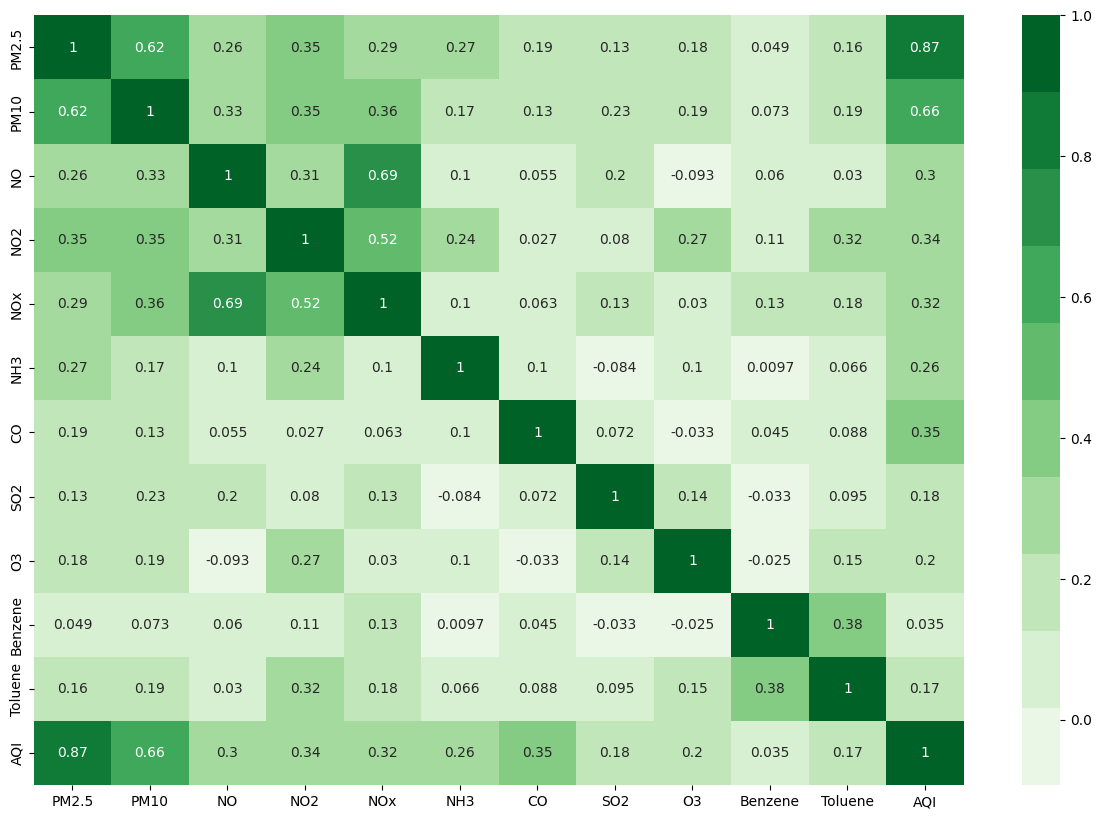

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df14.corr(),annot=True,cmap=cmap)

In [ ]:
df14

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,City
28,83.13,107.96,6.93,28.71,33.72,15.06,6.93,49.52,59.76,0.02,0.00,209.0,Ahmedabad
34,80.65,107.96,2.37,22.83,24.00,15.06,2.37,25.73,47.30,0.00,0.00,294.0,Ahmedabad
35,58.36,107.96,2.60,21.39,23.31,15.06,2.60,32.66,53.54,0.00,0.00,149.0,Ahmedabad
39,113.93,107.96,4.32,24.27,26.86,15.06,4.32,48.73,39.94,0.02,0.00,341.0,Ahmedabad
40,105.39,107.96,1.41,18.21,18.75,15.06,1.41,35.91,56.15,0.00,0.00,256.0,Ahmedabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27960,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0,Visakhapatnam
27961,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0,Visakhapatnam
27962,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0,Visakhapatnam
27963,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.0,Visakhapatnam


In [ ]:
df14.reset_index(drop=True,inplace=True)
df14

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,City
0,83.13,107.96,6.93,28.71,33.72,15.06,6.93,49.52,59.76,0.02,0.00,209.0,Ahmedabad
1,80.65,107.96,2.37,22.83,24.00,15.06,2.37,25.73,47.30,0.00,0.00,294.0,Ahmedabad
2,58.36,107.96,2.60,21.39,23.31,15.06,2.60,32.66,53.54,0.00,0.00,149.0,Ahmedabad
3,113.93,107.96,4.32,24.27,26.86,15.06,4.32,48.73,39.94,0.02,0.00,341.0,Ahmedabad
4,105.39,107.96,1.41,18.21,18.75,15.06,1.41,35.91,56.15,0.00,0.00,256.0,Ahmedabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22331,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0,Visakhapatnam
22332,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0,Visakhapatnam
22333,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0,Visakhapatnam
22334,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.0,Visakhapatnam


In [ ]:
dummies=pd.get_dummies(df14.City)
dummies

,Ahmedabad,Aizawl,Amaravati,Amritsar,Bengaluru,Bhopal,Brajrajnagar,Chandigarh,Chennai,Coimbatore,...,Jorapokhar,Kochi,Kolkata,Lucknow,Mumbai,Patna,Shillong,Talcher,Thiruvananthapuram,Visakhapatnam
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22331,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
22332,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
22333,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
22334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df15=pd.concat([df14,dummies.drop("Visakhapatnam",axis=1)],axis=1)
df15.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,...,Jaipur,Jorapokhar,Kochi,Kolkata,Lucknow,Mumbai,Patna,Shillong,Talcher,Thiruvananthapuram
0,83.13,107.96,6.93,28.71,33.72,15.06,6.93,49.52,59.76,0.02,...,0,0,0,0,0,0,0,0,0,0
1,80.65,107.96,2.37,22.83,24.00,15.06,2.37,25.73,47.30,0.00,...,0,0,0,0,0,0,0,0,0,0
2,58.36,107.96,2.60,21.39,23.31,15.06,2.60,32.66,53.54,0.00,...,0,0,0,0,0,0,0,0,0,0
3,113.93,107.96,4.32,24.27,26.86,15.06,4.32,48.73,39.94,0.02,...,0,0,0,0,0,0,0,0,0,0
4,105.39,107.96,1.41,18.21,18.75,15.06,1.41,35.91,56.15,0.00,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df15.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'AQI', 'City', 'Ahmedabad', 'Aizawl', 'Amaravati',
       'Amritsar', 'Bengaluru', 'Bhopal', 'Brajrajnagar', 'Chandigarh',
       'Chennai', 'Coimbatore', 'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati',
       'Hyderabad', 'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow',
       'Mumbai', 'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram'],
      dtype='object')

In [ ]:
df15.drop("City",axis=1,inplace=True)

In [ ]:
df15

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,...,Jaipur,Jorapokhar,Kochi,Kolkata,Lucknow,Mumbai,Patna,Shillong,Talcher,Thiruvananthapuram
0,83.13,107.96,6.93,28.71,33.72,15.06,6.93,49.52,59.76,0.02,...,0,0,0,0,0,0,0,0,0,0
1,80.65,107.96,2.37,22.83,24.00,15.06,2.37,25.73,47.30,0.00,...,0,0,0,0,0,0,0,0,0,0
2,58.36,107.96,2.60,21.39,23.31,15.06,2.60,32.66,53.54,0.00,...,0,0,0,0,0,0,0,0,0,0
3,113.93,107.96,4.32,24.27,26.86,15.06,4.32,48.73,39.94,0.02,...,0,0,0,0,0,0,0,0,0,0
4,105.39,107.96,1.41,18.21,18.75,15.06,1.41,35.91,56.15,0.00,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22331,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,...,0,0,0,0,0,0,0,0,0,0
22332,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,...,0,0,0,0,0,0,0,0,0,0
22333,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,...,0,0,0,0,0,0,0,0,0,0
22334,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X=df15.drop("AQI",axis=1)
X

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,...,Jaipur,Jorapokhar,Kochi,Kolkata,Lucknow,Mumbai,Patna,Shillong,Talcher,Thiruvananthapuram
0,83.13,107.96,6.93,28.71,33.72,15.06,6.93,49.52,59.76,0.02,...,0,0,0,0,0,0,0,0,0,0
1,80.65,107.96,2.37,22.83,24.00,15.06,2.37,25.73,47.30,0.00,...,0,0,0,0,0,0,0,0,0,0
2,58.36,107.96,2.60,21.39,23.31,15.06,2.60,32.66,53.54,0.00,...,0,0,0,0,0,0,0,0,0,0
3,113.93,107.96,4.32,24.27,26.86,15.06,4.32,48.73,39.94,0.02,...,0,0,0,0,0,0,0,0,0,0
4,105.39,107.96,1.41,18.21,18.75,15.06,1.41,35.91,56.15,0.00,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22331,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,...,0,0,0,0,0,0,0,0,0,0
22332,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,...,0,0,0,0,0,0,0,0,0,0
22333,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,...,0,0,0,0,0,0,0,0,0,0
22334,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y=df15["AQI"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8287626832955988

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.81996492, 0.83589423, 0.82817525, 0.81867084, 0.82857832])

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf=RandomForestRegressor(n_estimators=40)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.8727189605056221

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tr=DecisionTreeRegressor()
tr.fit(X_train,y_train)
tr.score(X_test,y_test)

0.7601067057968066

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],


                'splitter': ['best','random']
            }
        }

    }
    'absolute_error', 'squared_error', 'poisson', 'friedman_mse'
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valida

,model,best_score,best_params
0,linear_regression,0.826257,{'fit_intercept': True}
1,lasso,0.815839,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.764050,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [ ]:
  # 'n_estimators': [10,20,30,40,50],
                # 'criterion' : ['mse','friedman_mse'],
                # 'bootstrap': True,


                # 'splitter': ['best','random']

In [ ]:
param={'bootstrap': [True, False],'max_depth': [40, 50, 60, 70, None],'min_samples_leaf': [1, 2, 4],'min_samples_split': [2, 5, 10],'n_estimators': [10, 20, 30, 40]}

In [ ]:
param={'min_samples_leaf': [1, 2, 4],'n_estimators': [10, 20, 30, 40,50]}

In [ ]:
clf=GridSearchCV(rf,param,cv=4)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8745253549464573

In [ ]:
clf

GridSearchCV(cv=4, estimator=RandomForestRegressor(n_estimators=40),
             param_grid={'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [10, 20, 30, 40, 50]})